In [1]:
import gym
from src import algo

from tensorflow import keras

Matplotlib is building the font cache; this may take a moment.
2022-05-09 22:38:15.999004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:
2022-05-09 22:38:15.999112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## SimpleMaze_v1 DQN 50000 steps on EpsGreedyPolicy

In [2]:
# Loading the trained model
model = keras.models.load_model("models/SimpleMaze_v1_DQN_Eps_50000")

2022-05-09 22:38:30.034746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 22:38:30.036024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:
2022-05-09 22:38:30.036347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:
2022-05-09 22:38:30.036625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: ca

In [3]:
# Creating the environment
from env.SimpleMaze_v1 import SimpleMaze
env = SimpleMaze(4,4,True)

Map:
* 0 G * 
0 0 0 0 
* X 0 0 
0 0 0 * 


/home/sarthak/Ericsson-RL-Interpretability/env/SimpleMaze_v1.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.observation_space = spaces.Box(low, high, dtype=np.int)


In [4]:
'''
Inputs
-------
X[0]   x-index
X[1]   y-index
X[2]   start
X[3]   goal
X[4]   flag
X[5]   start_north
X[6]   goal_north
X[7]   flag_north
X[8]   start_south
X[9]   goal_south
X[10]  flag_south
X[11]  start_east
X[12]  goal_east
X[13]  flag_east
X[14]  start_west
X[15]  goal_west
X[16]  flag_west
X[17]  nb_flags

Outputs
--------
Y[0]   move up
Y[1]   move down
Y[2]   move left
Y[3]   move right
'''

'\nInputs\n-------\nX[0]   x-index\nX[1]   y-index\nX[2]   start\nX[3]   goal\nX[4]   flag\nX[5]   start_north\nX[6]   goal_north\nX[7]   flag_north\nX[8]   start_south\nX[9]   goal_south\nX[10]  flag_south\nX[11]  start_east\nX[12]  goal_east\nX[13]  flag_east\nX[14]  start_west\nX[15]  goal_west\nX[16]  flag_west\nX[17]  nb_flags\n\nOutputs\n--------\nY[0]   move up\nY[1]   move down\nY[2]   move left\nY[3]   move right\n'

In [5]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "data/SimpleMaze_v1_DQN_Eps_50000.csv"
dataset(env,model,filename)

  0%|                                                | 0/100000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
100%|██████████████████████████████████| 100000/100000 [03:34<00:00, 465.40it/s]


In [6]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,2)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7281.82it/s]

Instances checked: 20000
Predictions matched: 19999
Accuracy: 99.995%


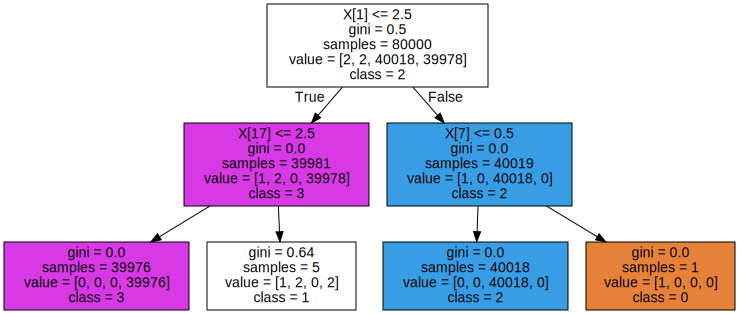

In [7]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [8]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,3)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7445.85it/s]

Instances checked: 20000
Predictions matched: 19999
Accuracy: 99.995%


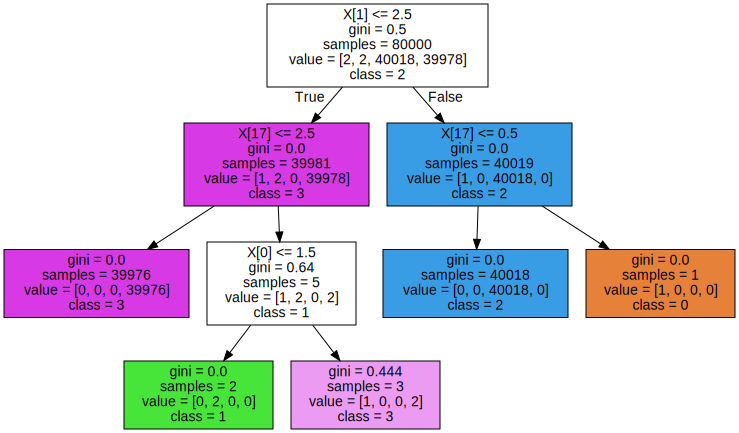

In [9]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [10]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,4)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7640.93it/s]


Instances checked: 20000
Predictions matched: 19999
Accuracy: 99.995%


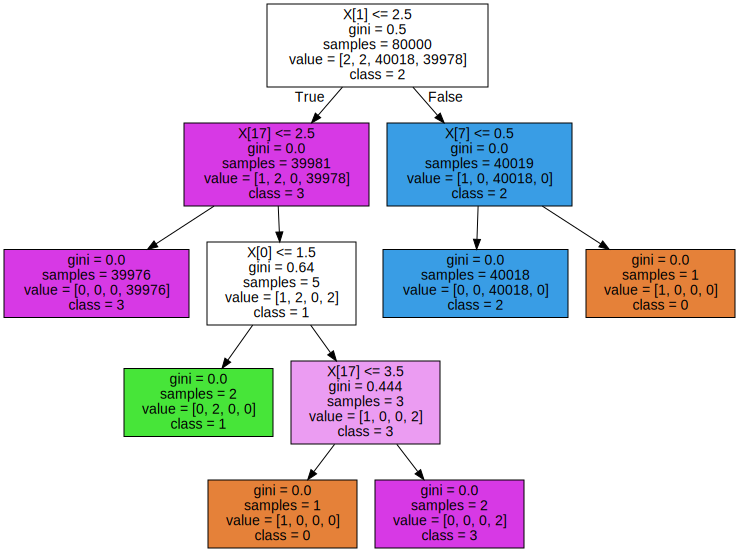

In [11]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

## SimpleMaze_v0 DQN 50000 steps on EpsGreedyPolicy

In [12]:
# Loading the trained model
model = keras.models.load_model("models/SimpleMaze_v0_DQN_Eps_50000")

In [13]:
# Creating the environment
from env.SimpleMaze_v0 import SimpleMaze
env = SimpleMaze(True)

Map:
0 0 0 0 
* X 0 * 
0 G * 0 
0 * 0 0 


/home/sarthak/Ericsson-RL-Interpretability/env/SimpleMaze_v0.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.observation_space = spaces.Box(low, high, dtype=np.int)


In [14]:
'''
Inputs
-------
X[0]   x-index
X[1]   y-index
X[2]   start
X[3]   goal
X[4]   flag
X[5]   start_north
X[6]   goal_north
X[7]   flag_north
X[8]   start_south
X[9]   goal_south
X[10]  flag_south
X[11]  start_east
X[12]  goal_east
X[13]  flag_east
X[14]  start_west
X[15]  goal_west
X[16]  flag_west
X[17]  nb_flags

Outputs
--------
Y[0]   move up
Y[1]   move down
Y[2]   move left
Y[3]   move right
'''

'\nInputs\n-------\nX[0]   x-index\nX[1]   y-index\nX[2]   start\nX[3]   goal\nX[4]   flag\nX[5]   start_north\nX[6]   goal_north\nX[7]   flag_north\nX[8]   start_south\nX[9]   goal_south\nX[10]  flag_south\nX[11]  start_east\nX[12]  goal_east\nX[13]  flag_east\nX[14]  start_west\nX[15]  goal_west\nX[16]  flag_west\nX[17]  nb_flags\n\nOutputs\n--------\nY[0]   move up\nY[1]   move down\nY[2]   move left\nY[3]   move right\n'

In [15]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "data/SimpleMaze_v0_DQN_Eps_50000.csv"
dataset(env,model,filename)

  0%|                                                | 0/100000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
100%|██████████████████████████████████| 100000/100000 [03:38<00:00, 458.26it/s]


In [16]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,2)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7805.36it/s]

Instances checked: 20000
Predictions matched: 16051
Accuracy: 80.255%


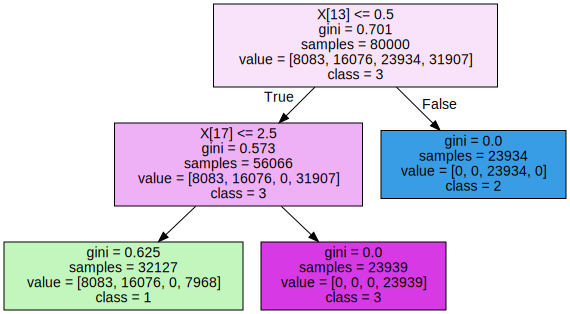

In [17]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [18]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,3)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7354.72it/s]

Instances checked: 20000
Predictions matched: 17968
Accuracy: 89.84%


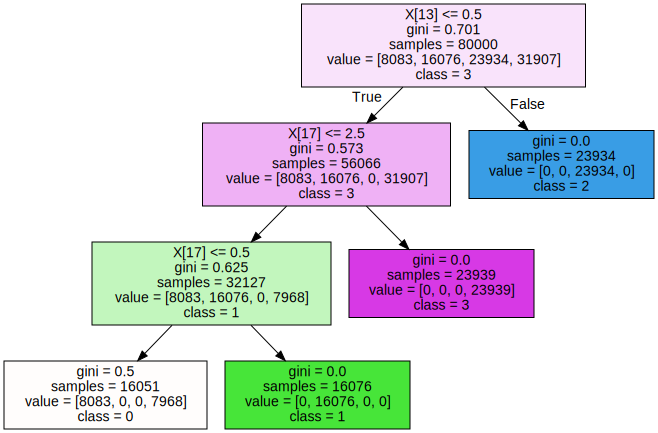

In [19]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [20]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,4)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7557.47it/s]

Instances checked: 20000
Predictions matched: 20000
Accuracy: 100.0%


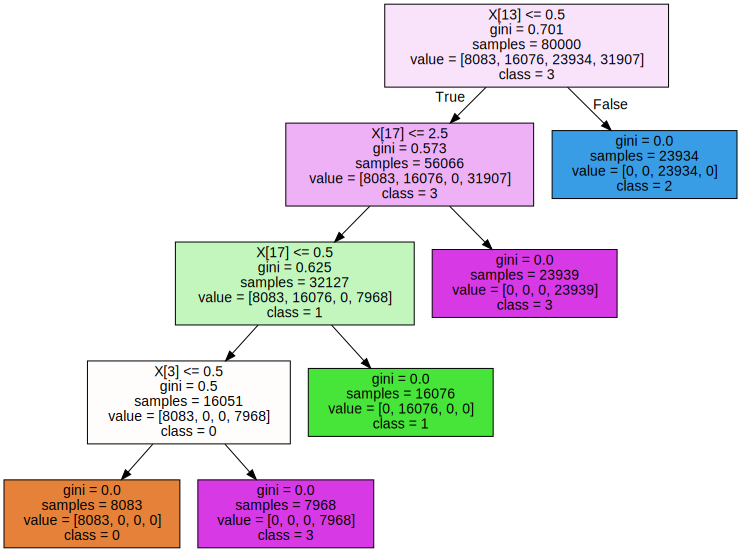

In [21]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

## CartPole-v1 DQN 50000 steps on EpsGreedyPolicy

In [22]:
# Loading the trained model
model = keras.models.load_model("models/CartPole_v1_DQN_Eps_50000")

In [23]:
# Creating the environment
env = gym.make("CartPole-v1")

In [24]:
'''
Inputs
-------
X[0]   Cart Position
X[1]   Cart Velocity
X[2]   Pole Angle
X[3]   Pole Angular Velocity

Outputs
--------
Y[0]   Push cart to the left
Y[1]   Push cart to the right
'''

'\nInputs\n-------\nX[0]   Cart Position\nX[1]   Cart Velocity\nX[2]   Pole Angle\nX[3]   Pole Angular Velocity\n\nOutputs\n--------\nY[0]   Push cart to the left\nY[1]   Push cart to the right\n'

In [25]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "data/CartPole_v1_DQN_Eps_50000.csv"
dataset(env,model,filename)

  0%|                                                | 0/100000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
100%|██████████████████████████████████| 100000/100000 [03:38<00:00, 458.65it/s]


In [26]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,2)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7875.50it/s]

Instances checked: 20000
Predictions matched: 17371
Accuracy: 86.855%


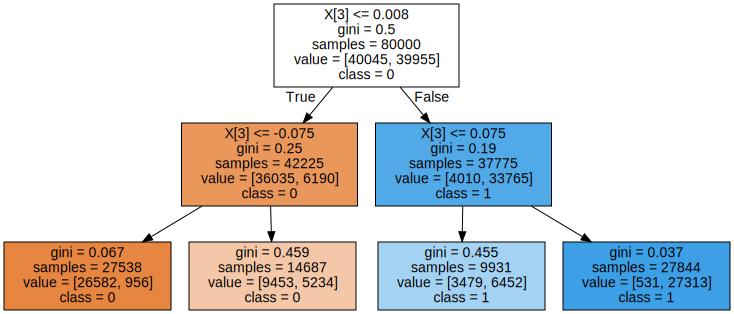

In [27]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [28]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,3)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7649.79it/s]


Instances checked: 20000
Predictions matched: 17921
Accuracy: 89.605%


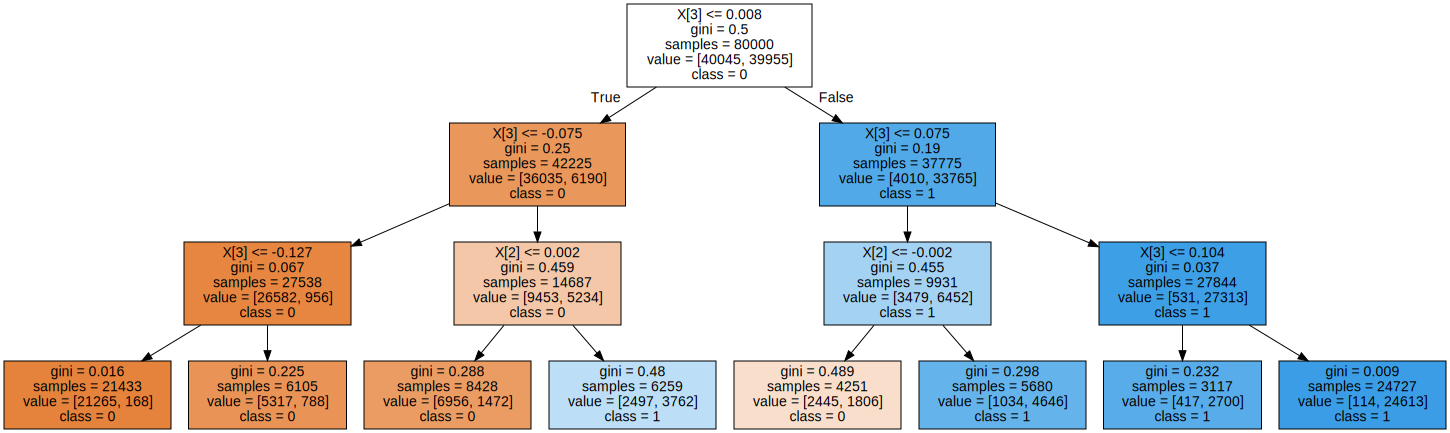

In [29]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [30]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,4)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7817.07it/s]

Instances checked: 20000
Predictions matched: 18062
Accuracy: 90.31%


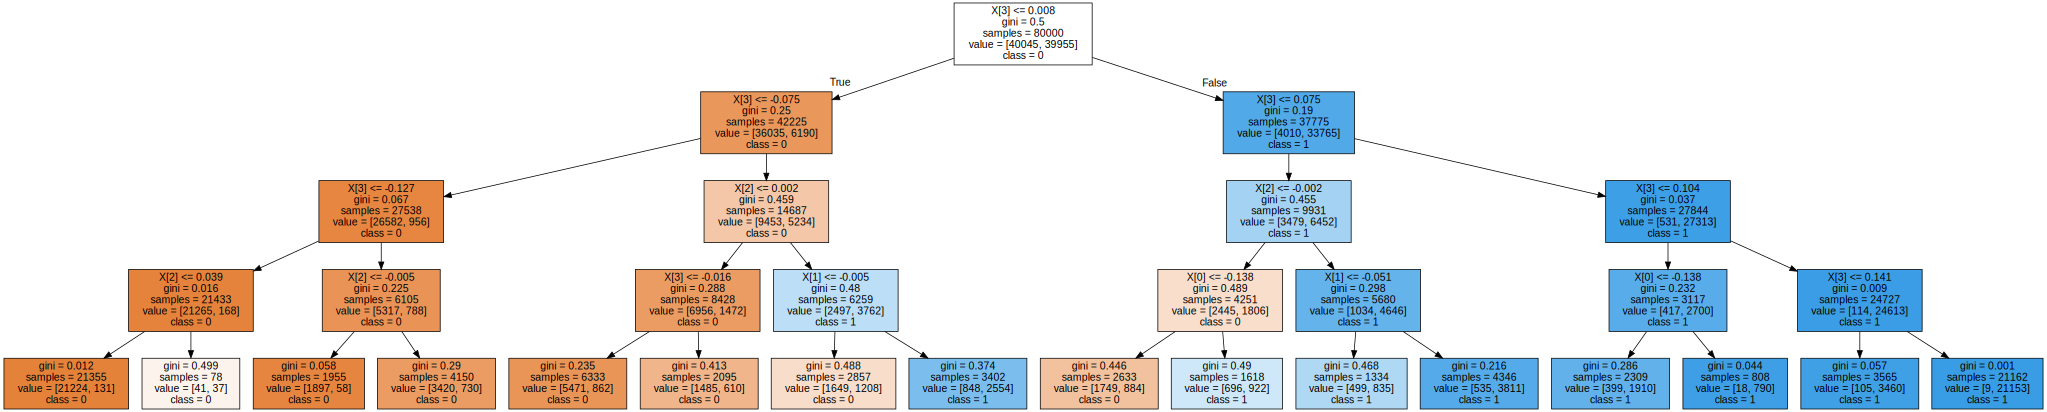

In [31]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [32]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7458.60it/s]

Instances checked: 20000
Predictions matched: 19181
Accuracy: 95.905%


In [33]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

## FrozenLake-v1 DQN 50000 steps on EpsGreedyPolicy

In [34]:
# Loading the trained model
model = keras.models.load_model("models/FrozenLake_v1_DQN_Eps_50000")

In [35]:
# Creating the environment
env = gym.make("FrozenLake-v1")

In [36]:
'''
Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H)
by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the
slippery nature of the frozen lake.

Inputs
-------
The input X[0] is a value representing the agent's current position as current_row * nrows + current_col
(where both the row and col start at 0).

For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number
of possible values for X[0] is dependent on the size of the map. For example, the 4x4 map has 16 possible
values for X[0].

Outputs
--------
Y[0]   move left
Y[1]   move down
Y[2]   move right
Y[3]   move up
'''

"\nFrozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H)\nby walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the\nslippery nature of the frozen lake.\n\nInputs\n-------\nThe input X[0] is a value representing the agent's current position as current_row * nrows + current_col\n(where both the row and col start at 0).\n\nFor example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number\nof possible values for X[0] is dependent on the size of the map. For example, the 4x4 map has 16 possible\nvalues for X[0].\n\nOutputs\n--------\nY[0]   move left\nY[1]   move down\nY[2]   move right\nY[3]   move up\n"

In [37]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "data/FrozenLake_v1_DQN_Eps_50000.csv"
dataset(env,model,filename)

  0%|                                                | 0/100000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
100%|██████████████████████████████████| 100000/100000 [03:42<00:00, 449.29it/s]


In [38]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,2)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7810.63it/s]

Instances checked: 20000
Predictions matched: 18079
Accuracy: 90.395%


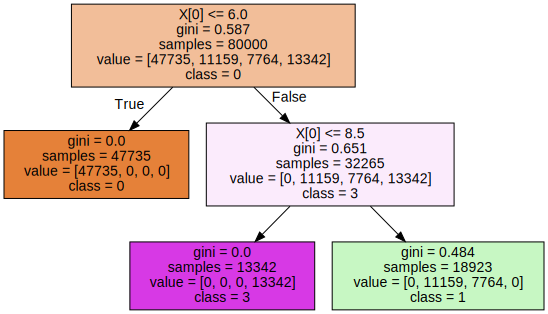

In [39]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [40]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,3)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7883.26it/s]

Instances checked: 20000
Predictions matched: 20000
Accuracy: 100.0%


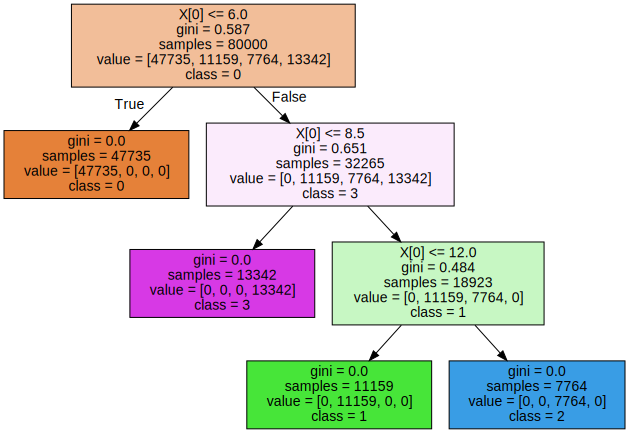

In [41]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph

In [42]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2,4)

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 7649.90it/s]

Instances checked: 20000
Predictions matched: 20000
Accuracy: 100.0%


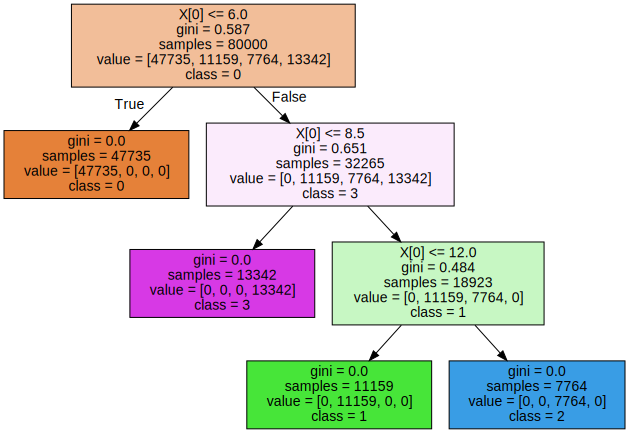

In [43]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph